In [1]:
!pip install mne

     |████████████████████████████████| 6.4MB 3.1MB/s 


In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
import pandas as pd


ModuleNotFoundError: No module named 'mne'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
X = np.load("/content/drive/My Drive/data/Graz/X_EEG.npy")
y = np.load("/content/drive/My Drive/data/Graz/y_EEG.npy")
metadata = pd.read_csv("/content/drive/My Drive/data/Graz/metadata_EEG.csv")
metadata.head()

,Unnamed: 0,subject,session,run
0,0,1,session_T,run_3
1,1,1,session_T,run_3
2,2,1,session_T,run_3
3,3,1,session_T,run_3
4,4,1,session_T,run_3


In [ ]:
subj = 1
X_train = X[(metadata["subject"]==subj) & (metadata["session"]=="session_T")]
y_train = y[(metadata["subject"]==subj) & (metadata["session"]=="session_T")]

X_test = X[(metadata["subject"]==subj) & (metadata["session"]=="session_E")]
y_test = y[(metadata["subject"]==subj) & (metadata["session"]=="session_E")]

In [ ]:

# Definir el pipeline y los parámetros para el GridSearch
pipe = Pipeline([('csp', CSP()),('classify', LDA(solver="eigen"))])
param_grid = [{'csp__n_components': [4, 5, 6, 7, 8],
                 'classify__shrinkage': ["auto", 0.1, 0.01, 0.001]}] 

# Grid Search con cross-validation
gs = GridSearchCV(pipe,
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=8)

gs.fit(X_train, y_train)

Computing data rank from raw with rank=None


C:\Users\Robotica_2\AppData\Local\Continuum\anaconda3\envs\bcis\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    Using tolerance 27 (2.2e-16 eps * 22 dim * 5.6e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 26 (2.2e-16 eps * 22 dim * 5.4e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 26 (2.2e-16 eps * 22 dim * 5.3e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 28 (2.2e-16 eps * 22 dim * 5.7e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 co

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('csp',
                                        CSP(cov_est='concat', cov_method_params=None, log=None, n_components=4,
  norm_trace=False, rank=None, reg=None, transform_into='average_power')),
                                       ('classify',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='eigen',
                                                                   store_covariance=False,
                                                                   tol=0.0001))],
                                verbose=False),
             iid='warn', n_jobs=8,
             param_grid=[{'cl

In [ ]:
from sklearn.metrics import classification_report

# Imprimir los mejores parámetros encontrados
print(gs.best_params_)

# Obtener la predicción con el mejor modelo
y_hat = gs.predict(X_test)
print(classification_report(y_test, y_hat))

{'classify__shrinkage': 'auto', 'csp__n_components': 5}
              precision    recall  f1-score   support

        feet       0.07      0.03      0.04        72
   left_hand       0.00      0.00      0.00        72
  right_hand       0.00      0.00      0.00        72
      tongue       0.28      1.00      0.44        72

    accuracy                           0.26       288
   macro avg       0.09      0.26      0.12       288
weighted avg       0.09      0.26      0.12       288



C:\Users\Robotica_2\AppData\Local\Continuum\anaconda3\envs\bcis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
from sklearn.metrics import f1_score, cohen_kappa_score

# Para cada paciente
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9]

accuracies = []
f1_scores = []
kappas = []

for subj in subjects:
    
    X_train = X[(metadata["subject"]==subj) & (metadata["session"]=="session_T")]
    y_train = y[(metadata["subject"]==subj) & (metadata["session"]=="session_T")]
    X_test = X[(metadata["subject"]==subj) & (metadata["session"]=="session_E")]
    y_test = y[(metadata["subject"]==subj) & (metadata["session"]=="session_E")]
    
    print(subj)
    pipe_final = Pipeline([('csp', CSP(n_components=5)),
                           ('classify', LDA(solver="eigen", shrinkage="auto"))])
    pipe_final.fit(X_train, y_train)
    
    # Estimación del dataset de prueba
    y_hat = pipe_final.predict(X_test)
    
    # resultados a guardar
    accuracies.append(np.mean(y_hat==y_test))
    f1_scores.append(f1_score(y_test, y_hat, average="macro"))
    kappas.append(cohen_kappa_score(y_test, y_hat))
    


1
Computing data rank from raw with rank=None
    Using tolerance 27 (2.2e-16 eps * 22 dim * 5.5e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 26 (2.2e-16 eps * 22 dim * 5.3e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 26 (2.2e-16 eps * 22 dim * 5.2e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 27 (2.2e-16 eps * 22 dim * 5.6e+15  max singular value)
  

<BarContainer object of 9 artists>

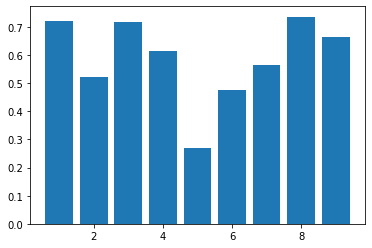

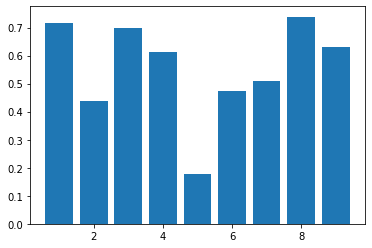

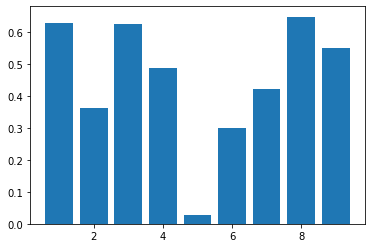

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(subjects, accuracies)

plt.figure()
plt.bar(subjects, f1_scores)

plt.figure()
plt.bar(subjects, kappas)

In [ ]:
#import pandas as pd

#pd.DataFrame({'Exactitud': accuracies,
#              'f1(macro)': f1_scores,
#              'Kappa': kappas}).transpose().to_csv("Resultados/LDA.csv")

In [13]:
np.round(np.array(accuracies), 3)

array([0.722, 0.521, 0.719, 0.615, 0.271, 0.476, 0.566, 0.736, 0.663])

In [14]:
np.mean(accuracies)

0.5875771604938271

In [27]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLP



# Segundo metodo
accuracies = []
f1_scores = []
kappas = []

for subj in subjects:
    
    X_train = X[metadata["subject"]==subj]
    y_train = y[metadata["subject"]==subj]
    X_test = X[metadata["subject"]!=subj]
    y_test = y[metadata["subject"]!=subj]
    
    print(subj)
    # Caso LDA
    #pipe_final = Pipeline([('csp', CSP(n_components=5)),
    #                       ('classify', LDA(solver="eigen", shrinkage="auto"))])

    # Caso RFC
    #pipe_final = Pipeline([('csp', CSP(n_components=8)),
    #                       ('classify', RFC(n_estimators=500, max_depth=4))])

    # Caso SVM
    #pipe_final = Pipeline([('csp', CSP(n_components=8)),
    #                       ('classify', SVC(kernel="rbf", gamma=0.1))])

    # Caso MLP
    pipe_final = Pipeline([('csp', CSP(n_components=5)),
                           ('classify', MLP(hidden_layer_sizes=(100, 10),
                                            activation="tanh",
                                            alpha=0.1,
                                           learning_rate_init=0.001,
                                           ))])


    pipe_final.fit(X_train, y_train)
    
    # Estimación del dataset de prueba
    y_hat = pipe_final.predict(X_test)
    
    # resultados a guardar
    accuracies.append(np.mean(y_hat==y_test))
    f1_scores.append(f1_score(y_test, y_hat, average="macro"))
    kappas.append(cohen_kappa_score(y_test, y_hat))


1
Computing data rank from raw with rank=None
    Using tolerance 38 (2.2e-16 eps * 22 dim * 7.8e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 37 (2.2e-16 eps * 22 dim * 7.5e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 36 (2.2e-16 eps * 22 dim * 7.5e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 39 (2.2e-16 eps * 22 dim * 8e+15  max singular value)
    

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2
Computing data rank from raw with rank=None
    Using tolerance 55 (2.2e-16 eps * 22 dim * 1.1e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 60 (2.2e-16 eps * 22 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 54 (2.2e-16 eps * 22 dim * 1.1e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 53 (2.2e-16 eps * 22 dim * 1.1e+16  max singular value)
  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3
Computing data rank from raw with rank=None
    Using tolerance 55 (2.2e-16 eps * 22 dim * 1.1e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 49 (2.2e-16 eps * 22 dim * 1e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 51 (2.2e-16 eps * 22 dim * 1e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 59 (2.2e-16 eps * 22 dim * 1.2e+16  max singular value)
    Es

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4
Computing data rank from raw with rank=None
    Using tolerance 37 (2.2e-16 eps * 22 dim * 7.6e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 34 (2.2e-16 eps * 22 dim * 6.9e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 34 (2.2e-16 eps * 22 dim * 7e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 37 (2.2e-16 eps * 22 dim * 7.7e+15  max singular value)
    

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5
Computing data rank from raw with rank=None
    Using tolerance 33 (2.2e-16 eps * 22 dim * 6.7e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 33 (2.2e-16 eps * 22 dim * 6.8e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 33 (2.2e-16 eps * 22 dim * 6.7e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 33 (2.2e-16 eps * 22 dim * 6.7e+15  max singular value)
  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


6
Computing data rank from raw with rank=None
    Using tolerance 50 (2.2e-16 eps * 22 dim * 1e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 46 (2.2e-16 eps * 22 dim * 9.4e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 47 (2.2e-16 eps * 22 dim * 9.6e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 48 (2.2e-16 eps * 22 dim * 9.9e+15  max singular value)
    

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


7
Computing data rank from raw with rank=None
    Using tolerance 35 (2.2e-16 eps * 22 dim * 7.1e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 34 (2.2e-16 eps * 22 dim * 7e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 35 (2.2e-16 eps * 22 dim * 7.1e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 38 (2.2e-16 eps * 22 dim * 7.7e+15  max singular value)
    

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


8
Computing data rank from raw with rank=None
    Using tolerance 63 (2.2e-16 eps * 22 dim * 1.3e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 65 (2.2e-16 eps * 22 dim * 1.3e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 65 (2.2e-16 eps * 22 dim * 1.3e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 71 (2.2e-16 eps * 22 dim * 1.5e+16  max singular value)
  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


9
Computing data rank from raw with rank=None
    Using tolerance 63 (2.2e-16 eps * 22 dim * 1.3e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 59 (2.2e-16 eps * 22 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 61 (2.2e-16 eps * 22 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 72 (2.2e-16 eps * 22 dim * 1.5e+16  max singular value)
  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<BarContainer object of 9 artists>

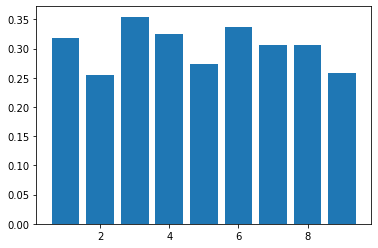

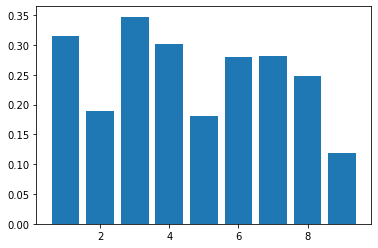

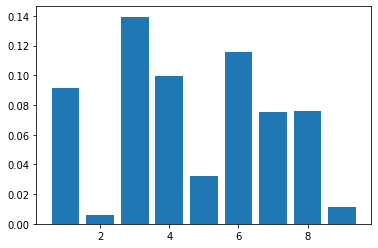

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(subjects, accuracies)

plt.figure()
plt.bar(subjects, f1_scores)

plt.figure()
plt.bar(subjects, kappas)

In [ ]:
pd.DataFrame({'Exactitud': accuracies,
              'f1(macro)': f1_scores,
              'Kappa': kappas}).transpose().to_csv("m2MLP.csv")